# Retrieval Test

In [4]:
from model.modeling import Retrieval
retrieval_module = Retrieval()

Using cache found in /home/kdh/.cache/torch/hub/facebookresearch_dinov2_main
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


(-0.5, 517.5, 517.5, -0.5)

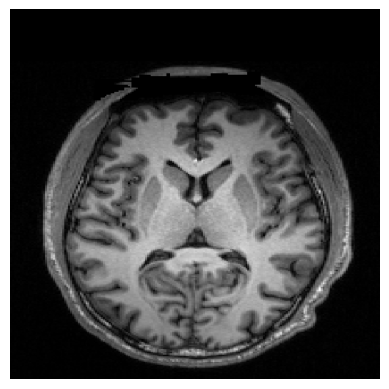

In [ ]:
from processor import processor
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import numpy as np
from utils import denormalize
test = nib.load('/home/kdh/code/BME_Capstone1/data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w.nii.gz').get_fdata()
test = processor(test[:, 92, :].astype(np.float32), mode='dino')
plt.imshow(test.permute(1,2,0))
plt.axis('off')
#test = processor(test, mode='dino')

In [7]:

target = nib.load('/home/kdh/code/BME_Capstone1/data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w.nii.gz').get_fdata()[:, 92, :]
target = processor(torch.Tensor(target).unsqueeze(0), mode='sam')
tmask = nib.load('/home/kdh/code/BME_Capstone1/data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz').get_fdata()[:, 92, :]
tmask = processor(tmask, mode='mask')


In [5]:
retrieval_result = retrieval_module(test[0], n=8)
from utils import visualize_retrieval
visualize_retrieval(retrieval_result)

RuntimeError: Input type (double) and bias type (float) should be the same

(-0.5, 255.5, 255.5, -0.5)

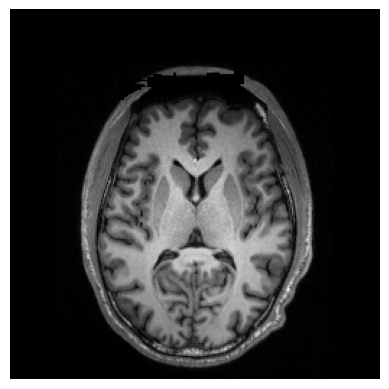

In [9]:
plt.imshow(target.permute(1, 2, 0))
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

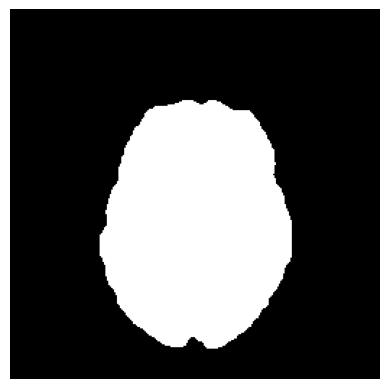

In [12]:
plt.imshow(tmask[0], cmap='gray')
plt.axis('off')

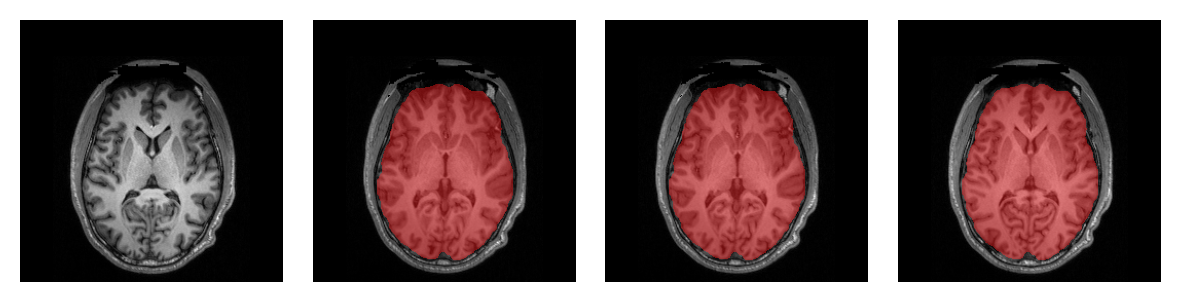

In [10]:
import numpy as np
plt.figure(dpi=200, figsize=(6, 2))
idx = 2
plt.subplot(1, 4, 1)
plt.imshow(target.permute(1, 2, 0))
plt.axis('off')
for img, msk in zip(retrieval_result['image'][:3], retrieval_result['mask'][:3]):
    plt.subplot(1, 4, idx)
    plt.imshow(img.permute(1, 2, 0))
    tmaskk = np.where(tmask==1, 1, np.nan)
    plt.imshow(tmaskk[0], cmap='Set1', alpha=0.5)
    plt.axis('off')
    idx += 1
plt.tight_layout()

#plt.savefig()